### Задание

На главной странице Яндекса поменяли местами иконки "Маркет" и "Карты" над строкой поиска. Необходимо проверить повлияло ли изменение и стали ли пользователи чаще кликать на иконку "Маркета" по возвращению на сайт.

Формула кликабельности иконки маркета:

CTR = Сумма кликов / Сумма сессий

Задачи:
1. Проверьте гипотезу о кликабельности иконки с помощью метрики CTR (click-through-rate)
2. Напишите выводы, которые можно сделать на основе анализа результатов

### Описание колонок

- `user_id` – идентификатор пользователя
- `session_id` – идентификатор сессии
- `click_id` – идентификатор клика
- `experimentVariant` – вариант эксперимента

In [71]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
import numpy as np

In [72]:
df0 = pd.read_csv('C:\\contest\\case_ctr.csv', sep = ';')

In [73]:
df0 = df0.drop(columns='Unnamed: 0')

In [74]:
df0.head(5)

,user_id,session_id,click_id,experimentVariant
0,4299b8c9c50c3e4e8a067f448426463e,08f9c3b0e2ff8da7bad6cc200fa735a2,56bcee80ce68ddc58c178a63288965b2,1
1,863829e0fc8e0dcd88f44c6a63db836a,d0ebf6ddaa8702e6de4e46854a1136ff,b209c6b14e91606a99d637ff6eb74cc6,1
2,640af3312483bea44b8159a8caaf0b3d,838c4a718830b5f1ac7be5e70745ff47,3f3d510c709ae5d9bae0331fcf776f3a,1
3,43de481cae63944b81db6fd5567a12bb,8f36aead1ceafb3e67f9957a7765549e,da73306047217a73a6ee0ea7477f2ad7,0
4,b84dd1a6c3df2e08eb7bef496cdf6d39,09799cdf1394b0e4b86ace899b7f218e,6e4b93932be600a5536c291888996037,1


Рассмотрим датасет на наличие пропущенных значений, дубликатов и прочих аномалий.

In [75]:
df0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   user_id            10000 non-null  object
 1   session_id         10000 non-null  object
 2   click_id           7655 non-null   object
 3   experimentVariant  10000 non-null  int64 
dtypes: int64(1), object(3)
memory usage: 312.6+ KB


In [76]:
df0.click_id.value_counts(dropna=False)

NaN                                 2345
3b2a3050b55fc74811e0b708bd54ace7       1
9274dccebc5951ba29ed6ce70819475e       1
dc0891b60d09247bad1c9984419584e2       1
cc4f576b511962d7613690c4acb6cda3       1
                                    ... 
9f86a22ee6749782864ec4b2d511ada4       1
1b429eb74fb9be6d64031684c222bb21       1
050bba2107d78463e8aa638773e18ac2       1
a051f083bc06867744f9707b78d2bed9       1
44acff427d9ba609dd2d527277692616       1
Name: click_id, Length: 7656, dtype: int64

Дубликаты по полю click_id отсутствуют. В случае отсутствия клика установлено пустое значение.

In [77]:
df0.nunique()

user_id              2246
session_id           6263
click_id             7655
experimentVariant       2
dtype: int64

In [78]:
print('Максимальное количество сессий на одного пользователя в течение эксперимента составляет {}'
      .format(round(df0.groupby('user_id', as_index=False).agg({'session_id':'nunique'}).session_id.max(), 1)))
print('Среднее количество сессий на одного пользователя в течение эксперимента составляет {}'
      .format(round(df0.groupby('user_id', as_index=False).agg({'session_id':'nunique'}).session_id.mean(), 1)))

Максимальное количество сессий на одного пользователя в течение эксперимента составляет 13
Среднее количество сессий на одного пользователя в течение эксперимента составляет 2.8


Рассмотрим распределение количества сессий по пользователям.

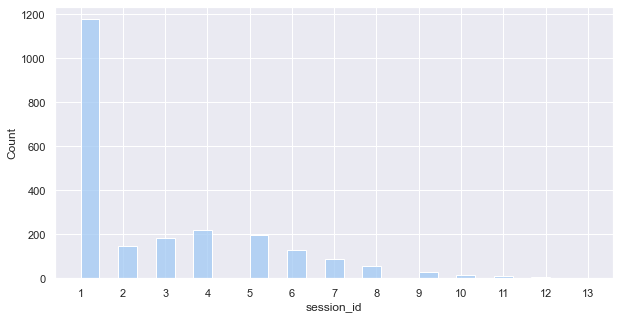

In [79]:
plt.figure(figsize = (10,5))
sns.set_theme(palette='pastel')
ax = sns.histplot(data = df0.groupby('user_id', as_index=False).agg({'session_id':'nunique'}), 
                  x = 'session_id',)
plt.xticks(df0.groupby('user_id', as_index=False).agg({'session_id':'nunique'}).session_id.unique())
plt.show()

Так как у нас нет данных о времени проведения эксперимента, отсутствует возможность оценить количество сессий на одного пользователя с точки зрения здравого смысла. В распределении очевидные аномалии отсутсвуют.

In [80]:
print('Максимальное количество кликов в течение одной сессии составляет {}'
      .format(round(df0.groupby('session_id', as_index=False).agg({'click_id':'nunique'}).click_id.max(), 1)))
print('Среднее количество кликов в течение одной сессии составляет {}'
      .format(round(df0.groupby('session_id', as_index=False).agg({'click_id':'nunique'}).click_id.mean(), 1)))

Максимальное количество кликов в течение одной сессии составляет 12
Среднее количество кликов в течение одной сессии составляет 1.2


Рассмотрим распределение количества кликов по сессиям.

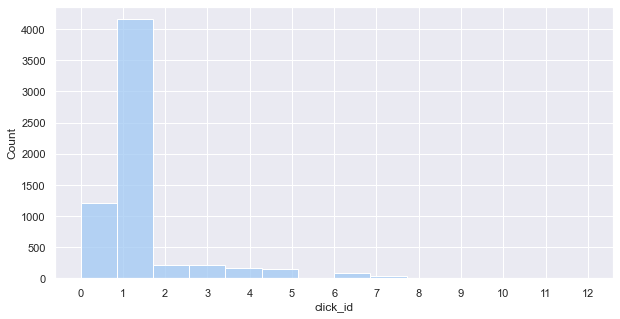

In [81]:
plt.figure(figsize = (10,5))
ax = sns.histplot(data = df0.groupby('session_id', as_index=False).agg({'click_id':'nunique'}), 
                  x = 'click_id',)
plt.xticks(df0.groupby('session_id', as_index=False).agg({'click_id':'nunique'}).click_id.unique())
plt.show()

В распределении кликов очевидные аномалии также отсутсвуют.

In [82]:
df0.groupby('user_id', as_index=False).agg({'experimentVariant':'nunique'}).experimentVariant.value_counts()

1    2246
Name: experimentVariant, dtype: int64

Каждый пользователь участвовал либо в контрольной, либо в тестовой ветке эксперимента, пересечений нет.

Согласно заданию нас интересует, изменилось ли соотношение кликов и сессиий в целом. То есть если пользователь и раньше кликал на иконку Маркета, а теперь стал кликать больше на эту иконку, то это тоже считается значимым результатом. Поэтому будем рассчитывать CTR как отношение всех кликов ко всем сессиям, а не считать был ли клик или его не было в течение каждой конкретной сессии.

In [83]:
df_processed = df0.groupby(['user_id', 'experimentVariant'], as_index=False).agg({'session_id':'nunique', 'click_id':'nunique'})
df_processed

,user_id,experimentVariant,session_id,click_id
0,001d19e09aba2cb4d888e338f46f858a,1,1,6
1,002153a52e4003b8426cd39096fd407c,1,3,3
2,002919af9552c77035b1da1a23988191,0,7,6
3,002c16db7b5afeccdcb5e7f4516ccb8e,1,5,5
4,0036ea1469ecd0808170f942533513a2,0,5,3
...,...,...,...,...
2241,ff7c33f3635554df1593d383f8b8456d,0,1,8
2242,ff92aedf4323446897d64750958f6000,0,1,7
2243,ff9cf07e8a30c591856845b6f681fef0,1,7,5
2244,ffc1dd3e8f3c8594ef3f7b4423cb3b6b,1,1,2


In [84]:
CTRs = df_processed.groupby('experimentVariant', as_index=False).agg({'session_id':'sum', 'click_id':'sum'})
CTRs['CTR'] = CTRs.click_id / CTRs.session_id
CTRs

,experimentVariant,session_id,click_id,CTR
0,0,3201,3951,1.234302
1,1,3062,3704,1.209667


Полученные результаты позволяют говорить о том, что показатель кликабельности не увеличился, однако, возможно данное уменьшение показателя значимо. 

Для того, чтобы проверить данную гипотезу для метрики вида ratio с различным распределением и дисперсией числителя и знаменателя мы используем дельта-метод для расчета приближенной совместной дисперсии числителя и знаменателя.

In [85]:
def var_ratio(x,y): #x/y
    mean_x = np.mean(x)
    mean_y = np.mean(y)
    var_x = np.var(x,ddof=1)
    var_y = np.var(y,ddof=1)
    cov_xy = np.cov(x,y,ddof=1)[0][1]
    result = (var_x/mean_x**2 + var_y/mean_y**2 - 2*cov_xy/(mean_x*mean_y))*(mean_x*mean_x)/(mean_y*mean_y*len(x))
    return result

Также вычислим доверительный интервал и p-value в рамках ttest-статистики

In [86]:
def ttest(CTR_control,CTR_test,var_control,var_test):
    diff = CTR_test - CTR_control
    var = var_control+var_test
    stde = 1.96*np.sqrt(var)
    lower = diff - stde 
    upper = diff + stde
    z = diff/np.sqrt(var)
    p_val = stats.norm.sf(abs(z))*2

    result = {'CTR_control':CTR_control,
             'CTR_test':CTR_test,
             'var_control':var_control,
             'var_test':var_test,
             'difference':diff,
             'lower_bound':lower,
             'upper_bound':upper,
             'p-value':p_val}
    return pd.DataFrame(result,index=[0])

In [87]:
var_control = var_ratio(df_processed[df_processed.experimentVariant == 0].click_id,
                        df_processed[df_processed.experimentVariant == 0].session_id)
var_test = var_ratio(df_processed[df_processed.experimentVariant == 1].click_id,
                          df_processed[df_processed.experimentVariant == 1].session_id)
CTR_control = CTRs.CTR[0]
CTR_test = CTRs.CTR[1]

ttest(CTR_control,CTR_test,var_control,var_test)

,CTR_control,CTR_test,var_control,var_test,difference,lower_bound,upper_bound,p-value
0,1.234302,1.209667,0.000817,0.000796,-0.024635,-0.103332,0.054063,0.539516


### Вывод
Проведенный статистический анализ не выявил значимых различий в клибельности иконки Маркета после ее перемещения.
Таким образом, раскатывать обновление на всех пользователей не имеет смысла.
Для повышения кликабельности иконки Маркета можно рассмотреть вариант с добавлением значка уведомлений в виде красной пометки с количеством непросмотренных предложений, сгенерированных рекомендательной системой Маркета. Это будет заметнее, но требует дополнительной работы.